<a href="https://www.kaggle.com/code/najeebz/bank-churn-catboost-lgbm-5-added-features?scriptVersionId=160598177" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# [Binary Classification with a Bank Churn Dataset](https://www.kaggle.com/competitions/playground-series-s4e1/overview)
### Playground Series - Season 4, Episode 1
_______________________________________________________________________ 
# Author Details:
- Name: Najeeb Haider Zaidi
- Email: zaidi.nh@gmail.com
- Profiles: [Github](https://github.com/snajeebz)  [LinkedIn](https://www.linkedin.com/in/najeebz) [Kaggle](https://www.kaggle.com/najeebz)
- Prepared for the submission to the competition.
________________________________________________________________________
# Attributions:


[Walter Reade, Ashley Chow. (2024). Binary Classification with a Bank Churn Dataset . Kaggle.](https://kaggle.com/competitions/playground-series-s4e1)
________________________________________________________________________
​
This Notebook is to be submitted to the competition so aims to start the process from the beginning to the creation of the submission csv file in proper format.
__________________________________________________________________________
# Code Execution and Versioning Repository: 
- [Execute the notebook in Kaggle](https://www.kaggle.com/code/najeebz/binary-classification-cnn-mlp-classifier)
- [Github Repository](https://github.com/snajeebz/playground)
​
____________________________________________________________________
# Citation:

Najeeb Zaidi. (2024). Binary Classification with a Bank Churn Dataset. Competition Submission. Kaggle. https://www.kaggle.com/code/najeebz/binary-classification-cnn-mlp-classifier

# Initiation:

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tqdm.auto import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.exceptions import ConvergenceWarning

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
from warnings import filterwarnings;
filterwarnings('ignore')

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e1/sample_submission.csv
/kaggle/input/playground-series-s4e1/train.csv
/kaggle/input/playground-series-s4e1/test.csv


# Reading the Dataset

In [2]:
df=pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
test=pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')

In [3]:
test

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,275052,15662091,P'eng,570,Spain,Male,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,275053,15774133,Cox,575,France,Female,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,275054,15728456,Ch'iu,712,France,Male,31.0,2,0.00,2,1.0,0.0,16287.38
110021,275055,15687541,Yegorova,709,France,Female,32.0,3,0.00,1,1.0,1.0,158816.58


In [4]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# Exploring the Dataset

In [5]:
test.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [6]:
df.isnull().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.Geography.value_counts()

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

In [8]:
df.NumOfProducts.value_counts()


NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

In [9]:
df.IsActiveMember.describe()

count    165034.000000
mean          0.497770
std           0.499997
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: IsActiveMember, dtype: float64

In [10]:
df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,165029,15667085,Meng,667,Spain,Female,33.0,2,0.00,1,1.0,1.0,131834.75,0
165030,165030,15665521,Okechukwu,792,France,Male,35.0,3,0.00,1,0.0,0.0,131834.45,0
165031,165031,15664752,Hsia,565,France,Male,31.0,5,0.00,1,1.0,1.0,127429.56,0
165032,165032,15689614,Hsiung,554,Spain,Female,30.0,7,161533.00,1,0.0,1.0,71173.03,0


# Encoding the Columns

In [11]:
def encoder(df):
    from sklearn.preprocessing import LabelEncoder
    labelencoder = LabelEncoder()
    for col in df.columns:
        if df[col].dtypes=='object':
            df[col]=labelencoder.fit_transform(df[col])
    return df
def Onehot(df):
    from sklearn.preprocessing import OneHotEncoder
    ohe=OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')
    cat_cols=ohe.fit_transform(df.select_dtypes(include=['category']))
    print(cat_cols.columns)
    a=df.drop(columns=df.select_dtypes(include=['category']))
    dff=pd.concat([a,cat_cols],axis=1)
    print(dff.columns)
    return dff
    


# Visualizations:

In [12]:
train_df=df[['Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
test_df=test[['Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
train_df=encoder(train_df)
test_df=encoder(test_df)
train_df[['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']]=train_df[['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']].astype('category')
test_df[['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']]=test_df[['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember']].astype('category')


In [13]:
train_df.dtypes

Surname               int64
CreditScore           int64
Geography          category
Gender             category
Age                 float64
Tenure             category
Balance             float64
NumOfProducts      category
HasCrCard          category
IsActiveMember     category
EstimatedSalary     float64
Exited                int64
dtype: object

In [14]:
cat_cols = df[['Geography','Gender','Tenure','NumOfProducts','HasCrCard','IsActiveMember','Exited']]
num_cols= train_df[['CreditScore', 'Age','Balance','EstimatedSalary']]

## Categorical Count Plots

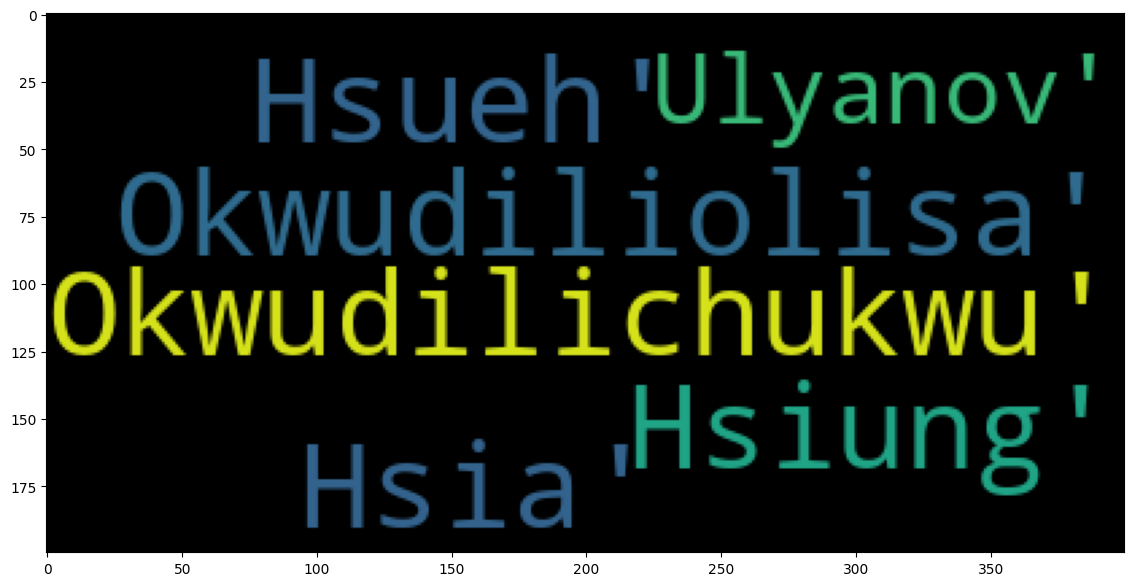

In [15]:
from wordcloud import WordCloud, STOPWORDS

text = df['Surname'].values 
plt.figure(figsize=[15,7])
wc = WordCloud().generate(str(text))
plt.imshow(wc)

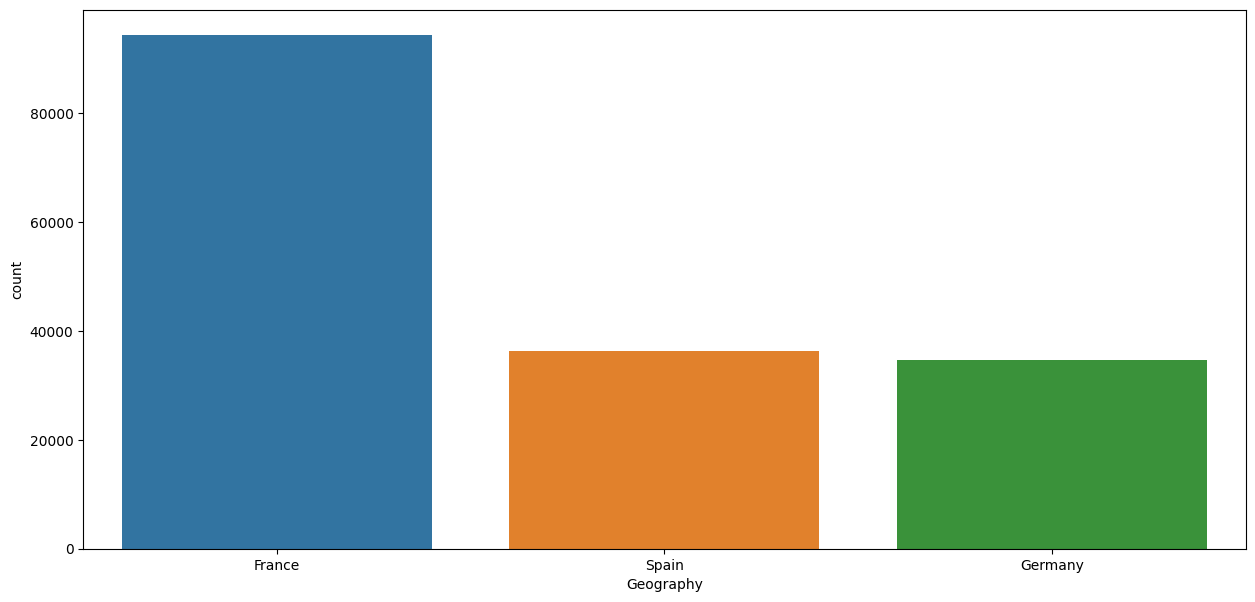

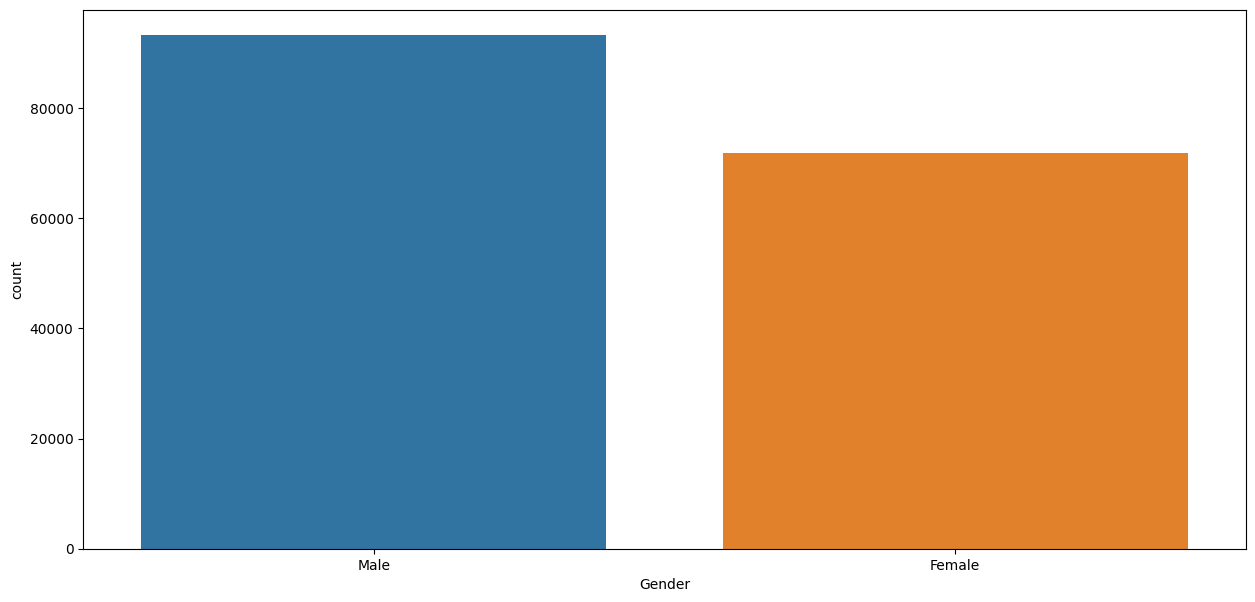

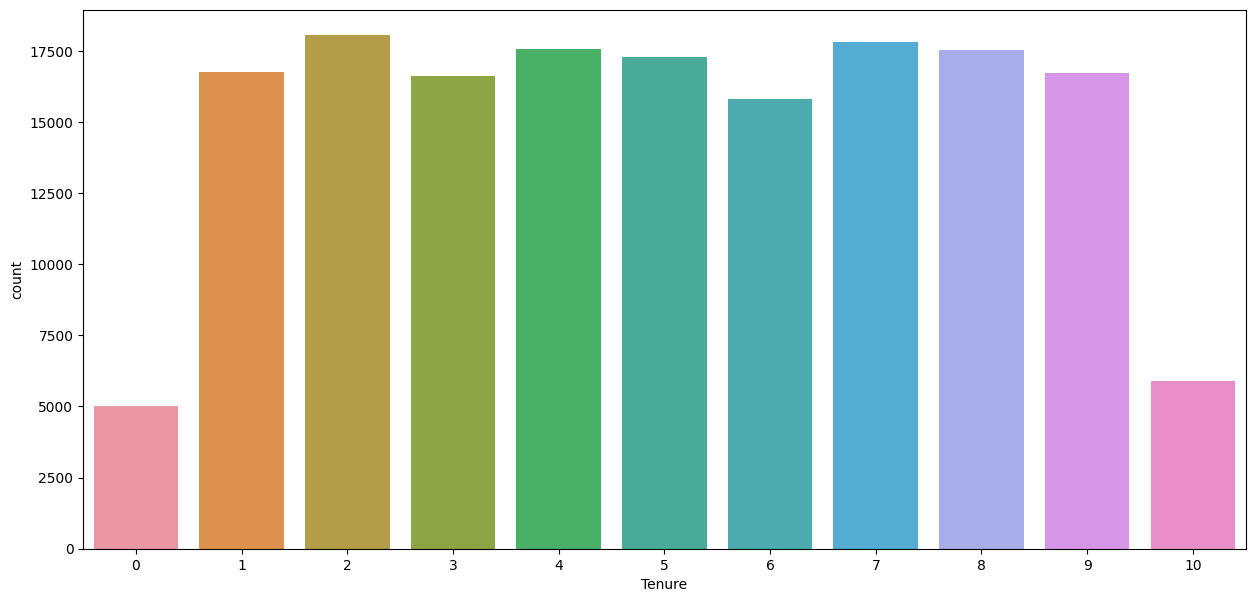

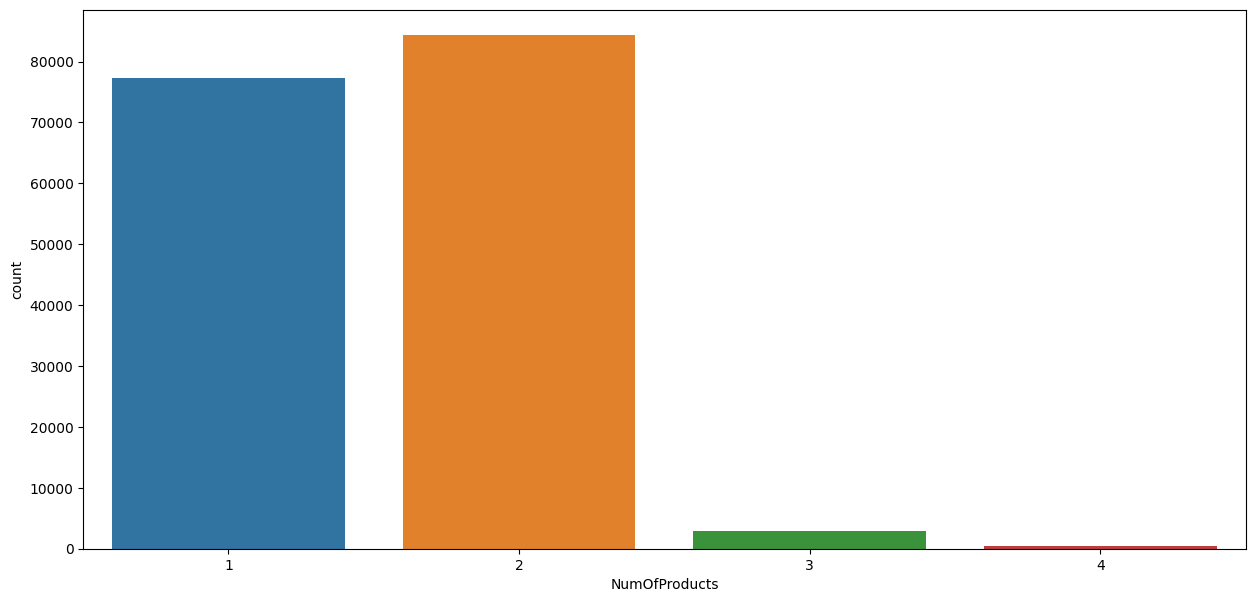

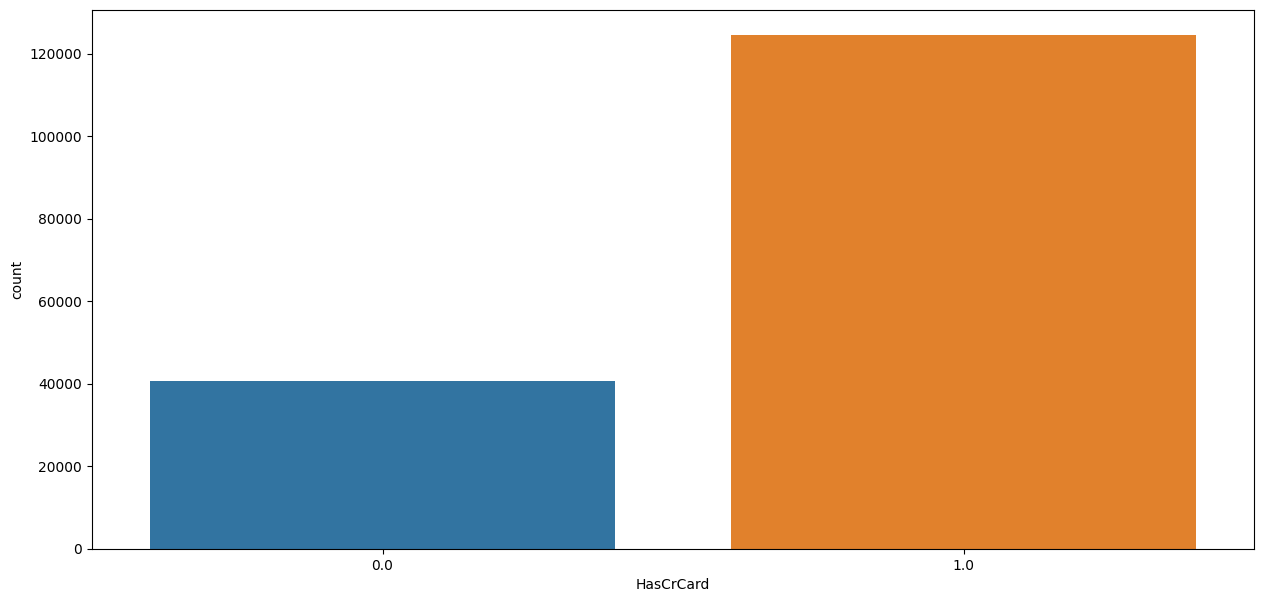

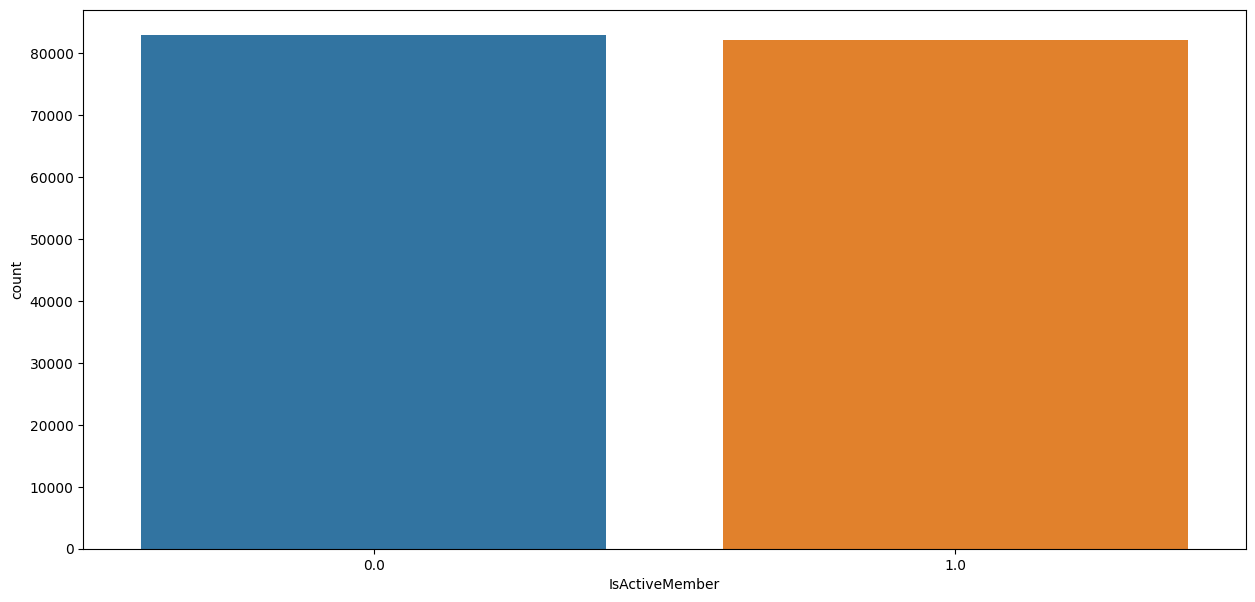

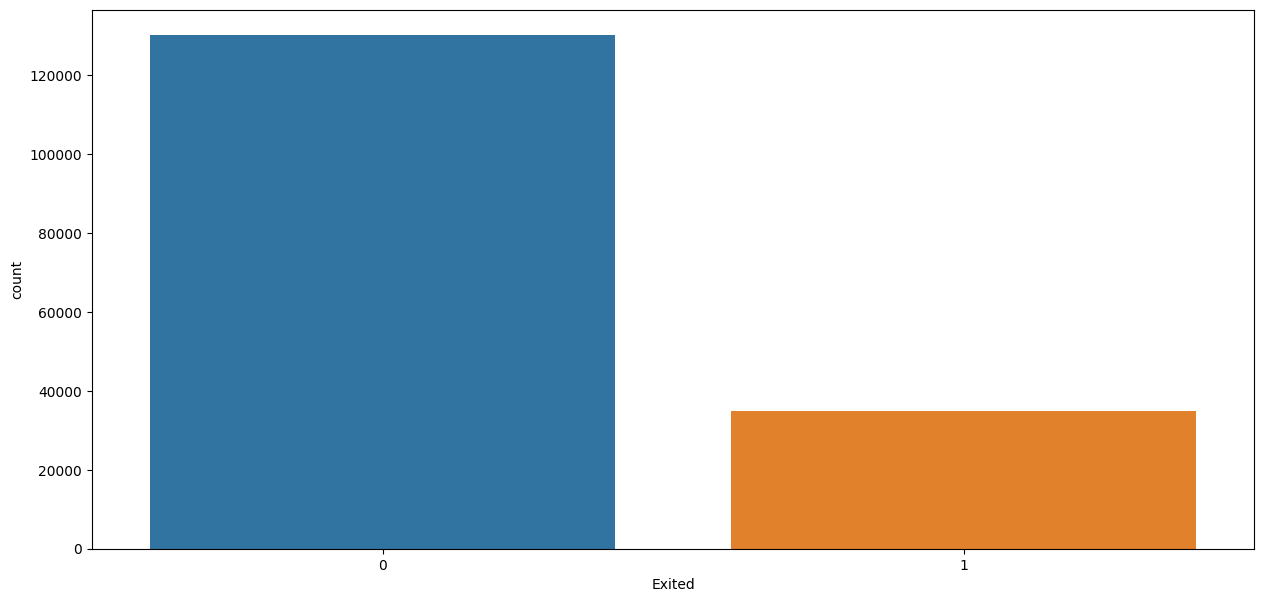

In [16]:
for col in cat_cols:
    plt.figure(figsize=[15,7])
    sns.countplot(df,x=df[col])
    plt.show()

## Histograms of Numerical Columns:

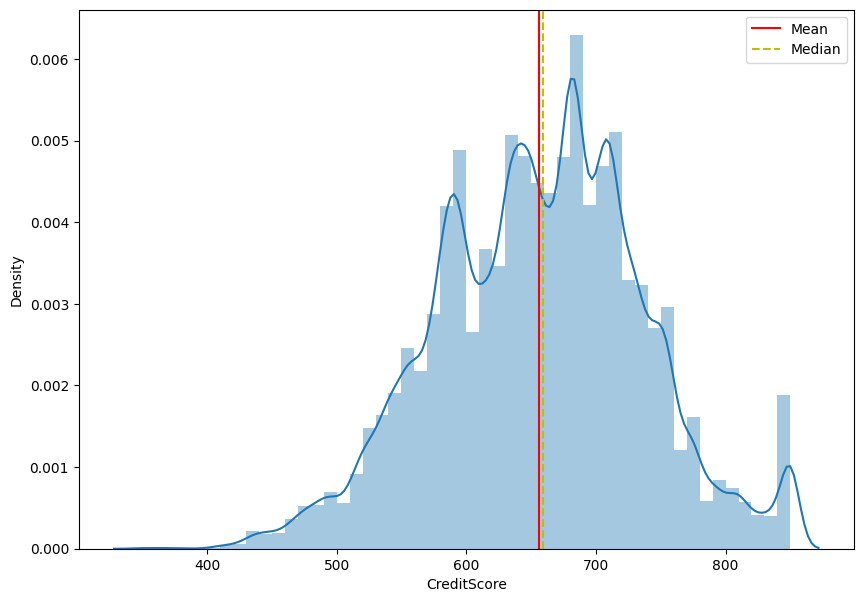

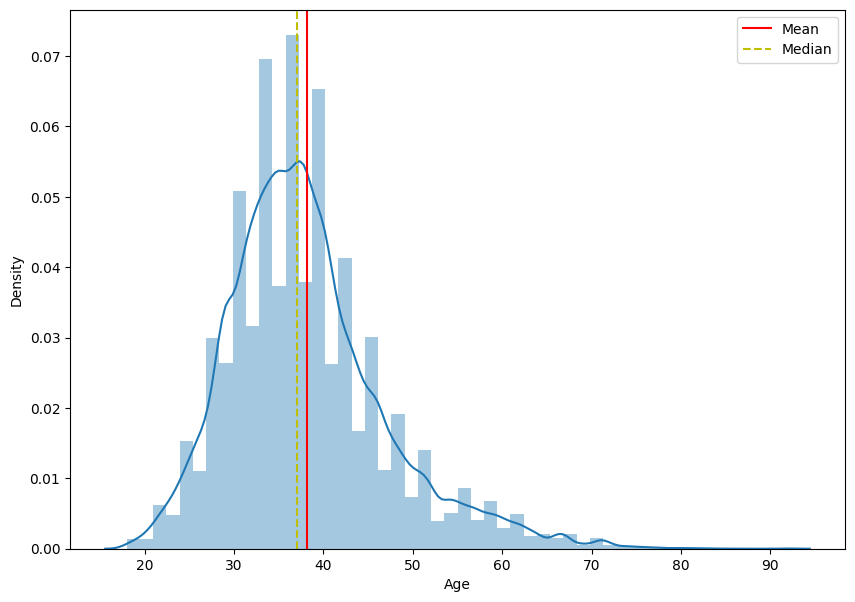

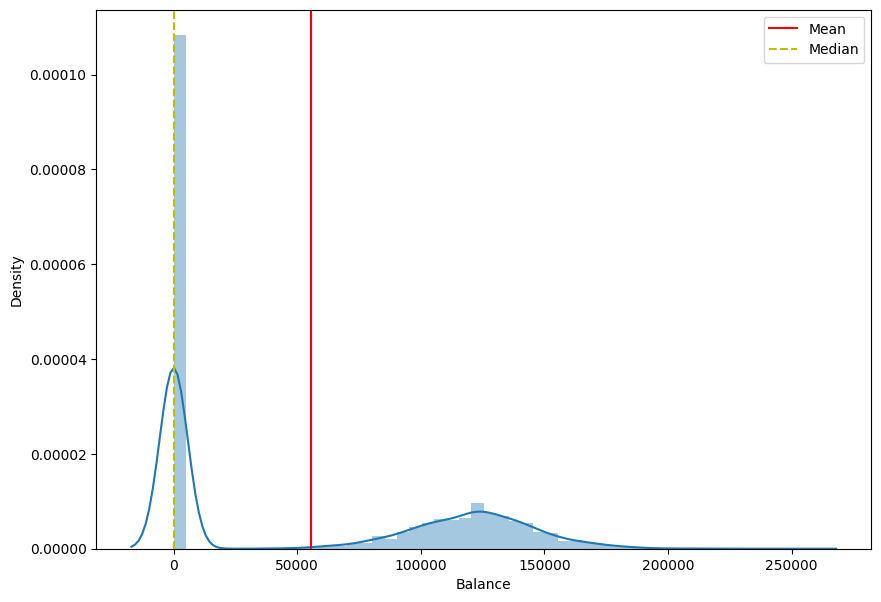

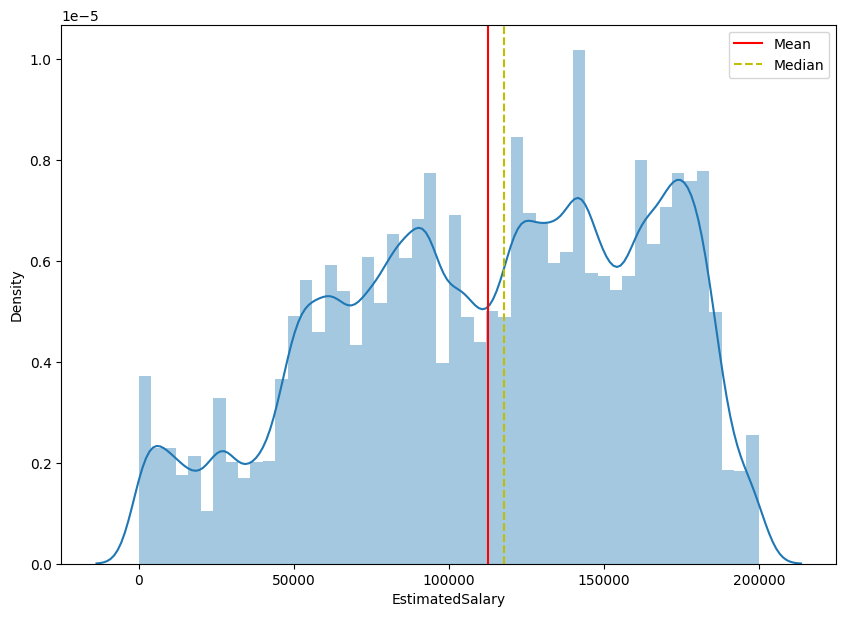

In [17]:
for col in num_cols:
    plt.figure(figsize=[10,7])
    sns.distplot(df[col],kde=True)
    plt.axvline(df[col].mean(),color='r', label='Mean')
    plt.axvline(df[col].median(),color='y', linestyle='--',label='Median')
    plt.legend()
    plt.show()

## Sunburst Chart ( Understanding the Hierarchy)

In [18]:
import plotly.express as px
fig = px.sunburst(
    df,
    path=['Geography','Gender','NumOfProducts','IsActiveMember','Exited'], 
    color='Exited',color_discrete_map={'1':'gold', '0':'darkblue'},
    width=1200, height=1200
)
fig.show()

## Graphical Relationships between different columns

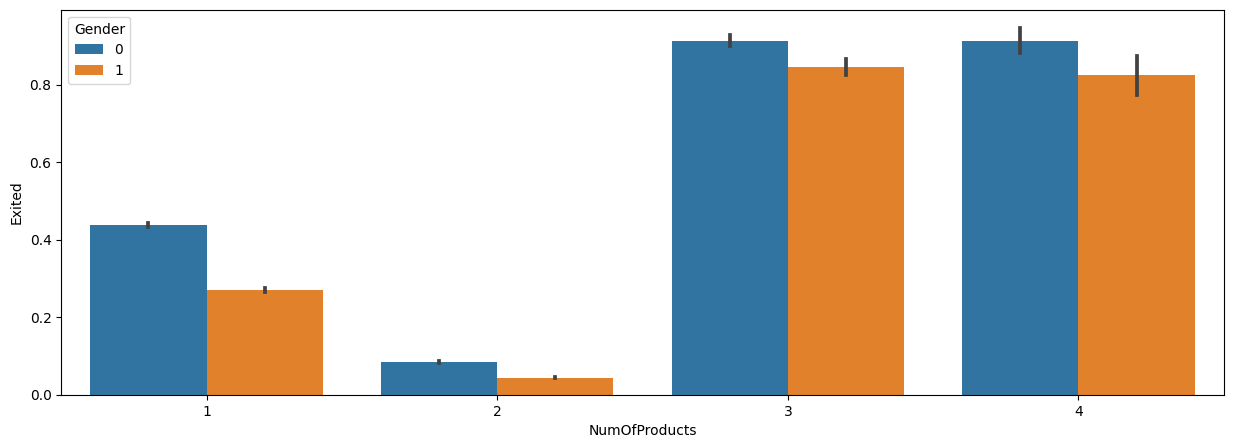

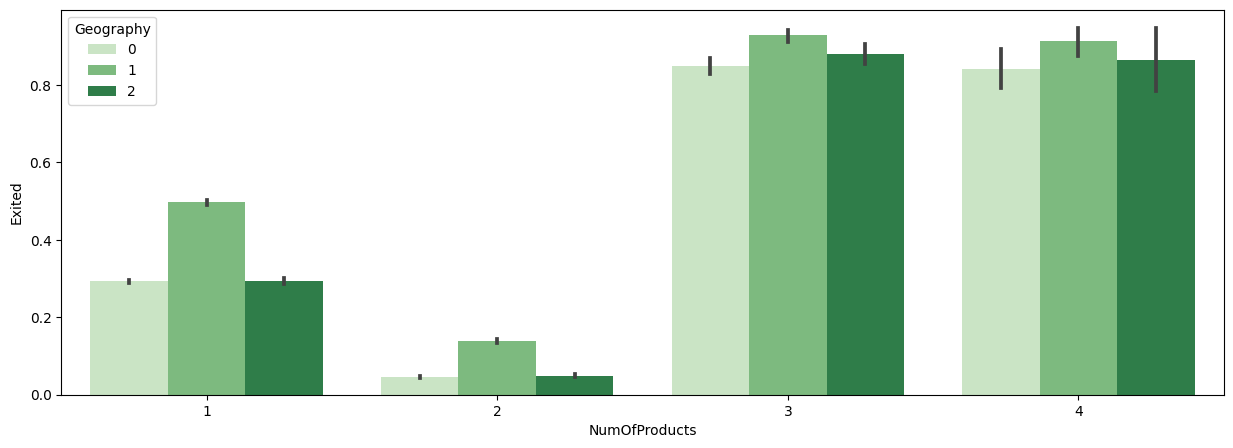

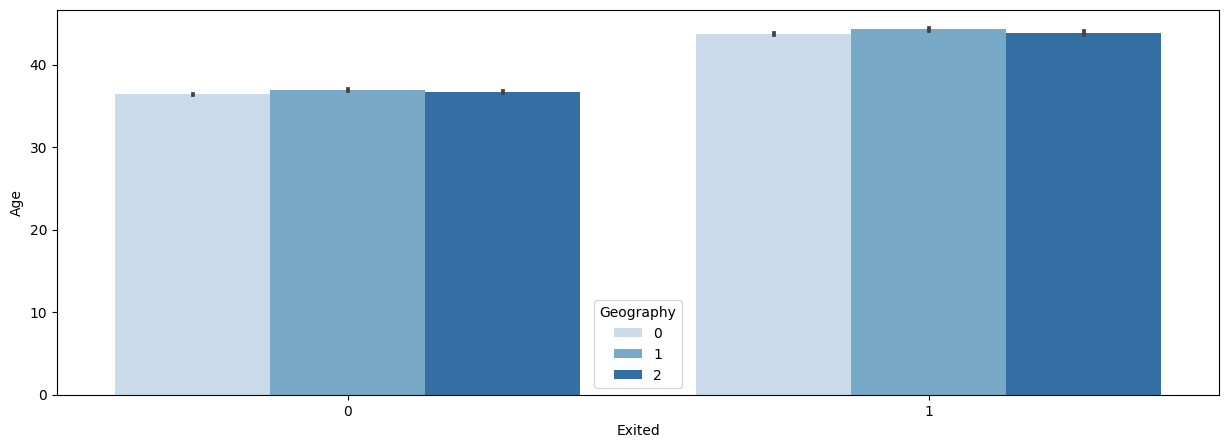

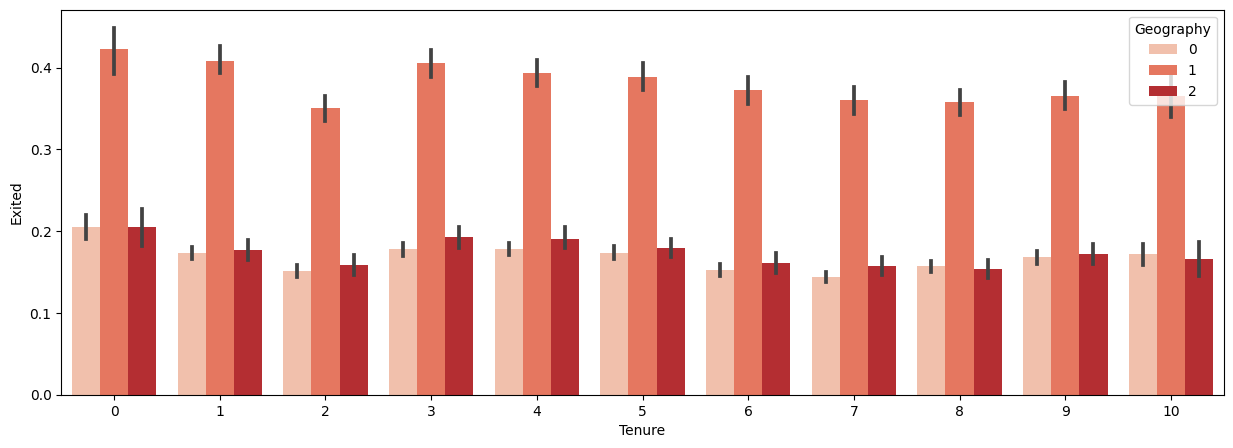

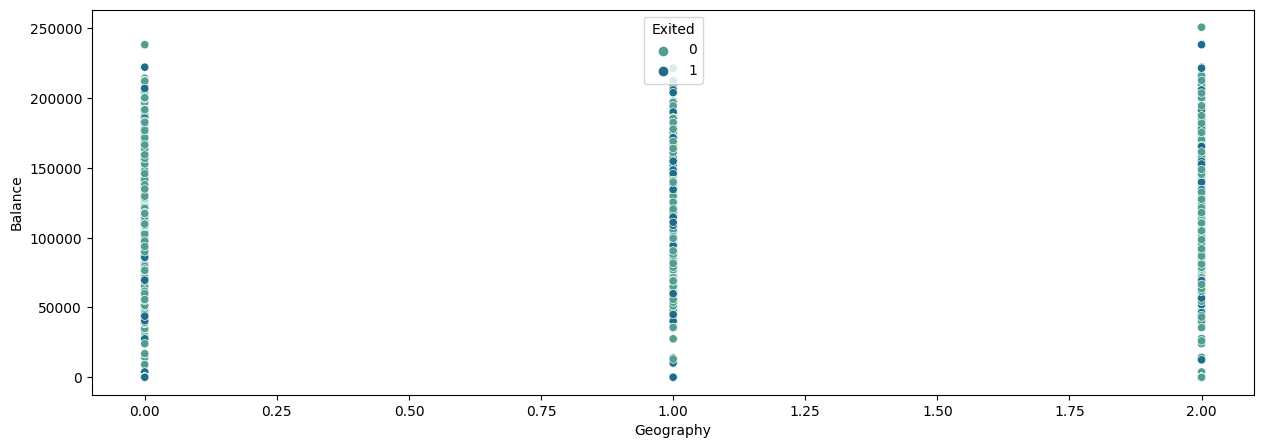

In [19]:
plt.figure(figsize=(15, 5))
s=sns.barplot(train_df,x='NumOfProducts',y='Exited',hue='Gender')
plt.figure(figsize=(15, 5))
s=sns.barplot(train_df,x='NumOfProducts',y='Exited',hue='Geography', palette='Greens')
plt.figure(figsize=(15, 5))
s=sns.barplot(train_df,y='Age',x='Exited',hue='Geography',palette='Blues')
plt.figure(figsize=(15, 5))
s=sns.barplot(train_df,x='Tenure',y='Exited',hue='Geography',palette='Reds')
plt.figure(figsize=(15, 5))
s=sns.scatterplot(train_df,y='Balance',x='Geography',hue='Exited',palette='crest')

# Preparing for Model:

## Evaluating the Correlations:

In [20]:
test_df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,1482,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75
1,1812,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27
2,1246,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09
3,1832,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57
4,1079,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00
...,...,...,...,...,...,...,...,...,...,...,...
110018,1933,570,2,1,29.0,7,116099.82,1,1.0,1.0,148087.62
110019,579,575,0,0,36.0,4,178032.53,1,1.0,1.0,42181.68
110020,410,712,0,1,31.0,2,0.00,2,1.0,0.0,16287.38
110021,2656,709,0,0,32.0,3,0.00,1,1.0,1.0,158816.58


In [21]:
def cluster(X):
    from sklearn import cluster
    agglo = cluster.KMeans(n_clusters=5,random_state=0, n_init="auto")
    agglo.fit(X)
    return ((agglo.labels_+1)/5)

X=train_df[['Age','Gender']]
train_df['Cluster-1']=(cluster(X)+1)/5  
X=train_df[['Gender', 'Age', 'Tenure']]
train_df['Cluster-2']=(cluster(X)+1)/5  
X=train_df[['Age','Tenure']]

X=test_df[['Age','Gender']]
test_df['Cluster-1']=(cluster(X)+1)/5  
X=test_df[['Gender', 'Age', 'Tenure']]
test_df['Cluster-2']=(cluster(X)+1)/5  
X=test_df[['Age','Tenure']]
test_df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Cluster-1,Cluster-2
0,1482,586,0,0,23.0,2,0.00,2,0.0,1.0,160976.75,0.36,0.40
1,1812,683,0,0,46.0,2,0.00,1,1.0,0.0,72549.27,0.32,0.36
2,1246,656,0,0,34.0,7,0.00,2,1.0,0.0,138882.09,0.24,0.24
3,1832,681,0,1,36.0,8,0.00,1,1.0,0.0,113931.57,0.24,0.32
4,1079,752,1,1,38.0,10,121263.62,1,1.0,0.0,139431.00,0.32,0.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110018,1933,570,2,1,29.0,7,116099.82,1,1.0,1.0,148087.62,0.36,0.40
110019,579,575,0,0,36.0,4,178032.53,1,1.0,1.0,42181.68,0.24,0.32
110020,410,712,0,1,31.0,2,0.00,2,1.0,0.0,16287.38,0.24,0.24
110021,2656,709,0,0,32.0,3,0.00,1,1.0,1.0,158816.58,0.24,0.24


In [22]:
X=train_df[['Age']]
train_df['Agebins']=(cluster(X)+1)/5  
X=train_df[['Balance']]
train_df['Balancebins']=(cluster(X)+1)/5 
X=train_df[['EstimatedSalary']]
train_df['ESbins']=(cluster(X)+1)/5
X=test_df[['Age']]
test_df['Agebins']=(cluster(X)+1)/5  
X=test_df[['Balance']]
test_df['Balancebins']=(cluster(X)+1)/5 
X=test_df[['EstimatedSalary']]
test_df['ESbins']=(cluster(X)+1)/5


# Correlation between the Features

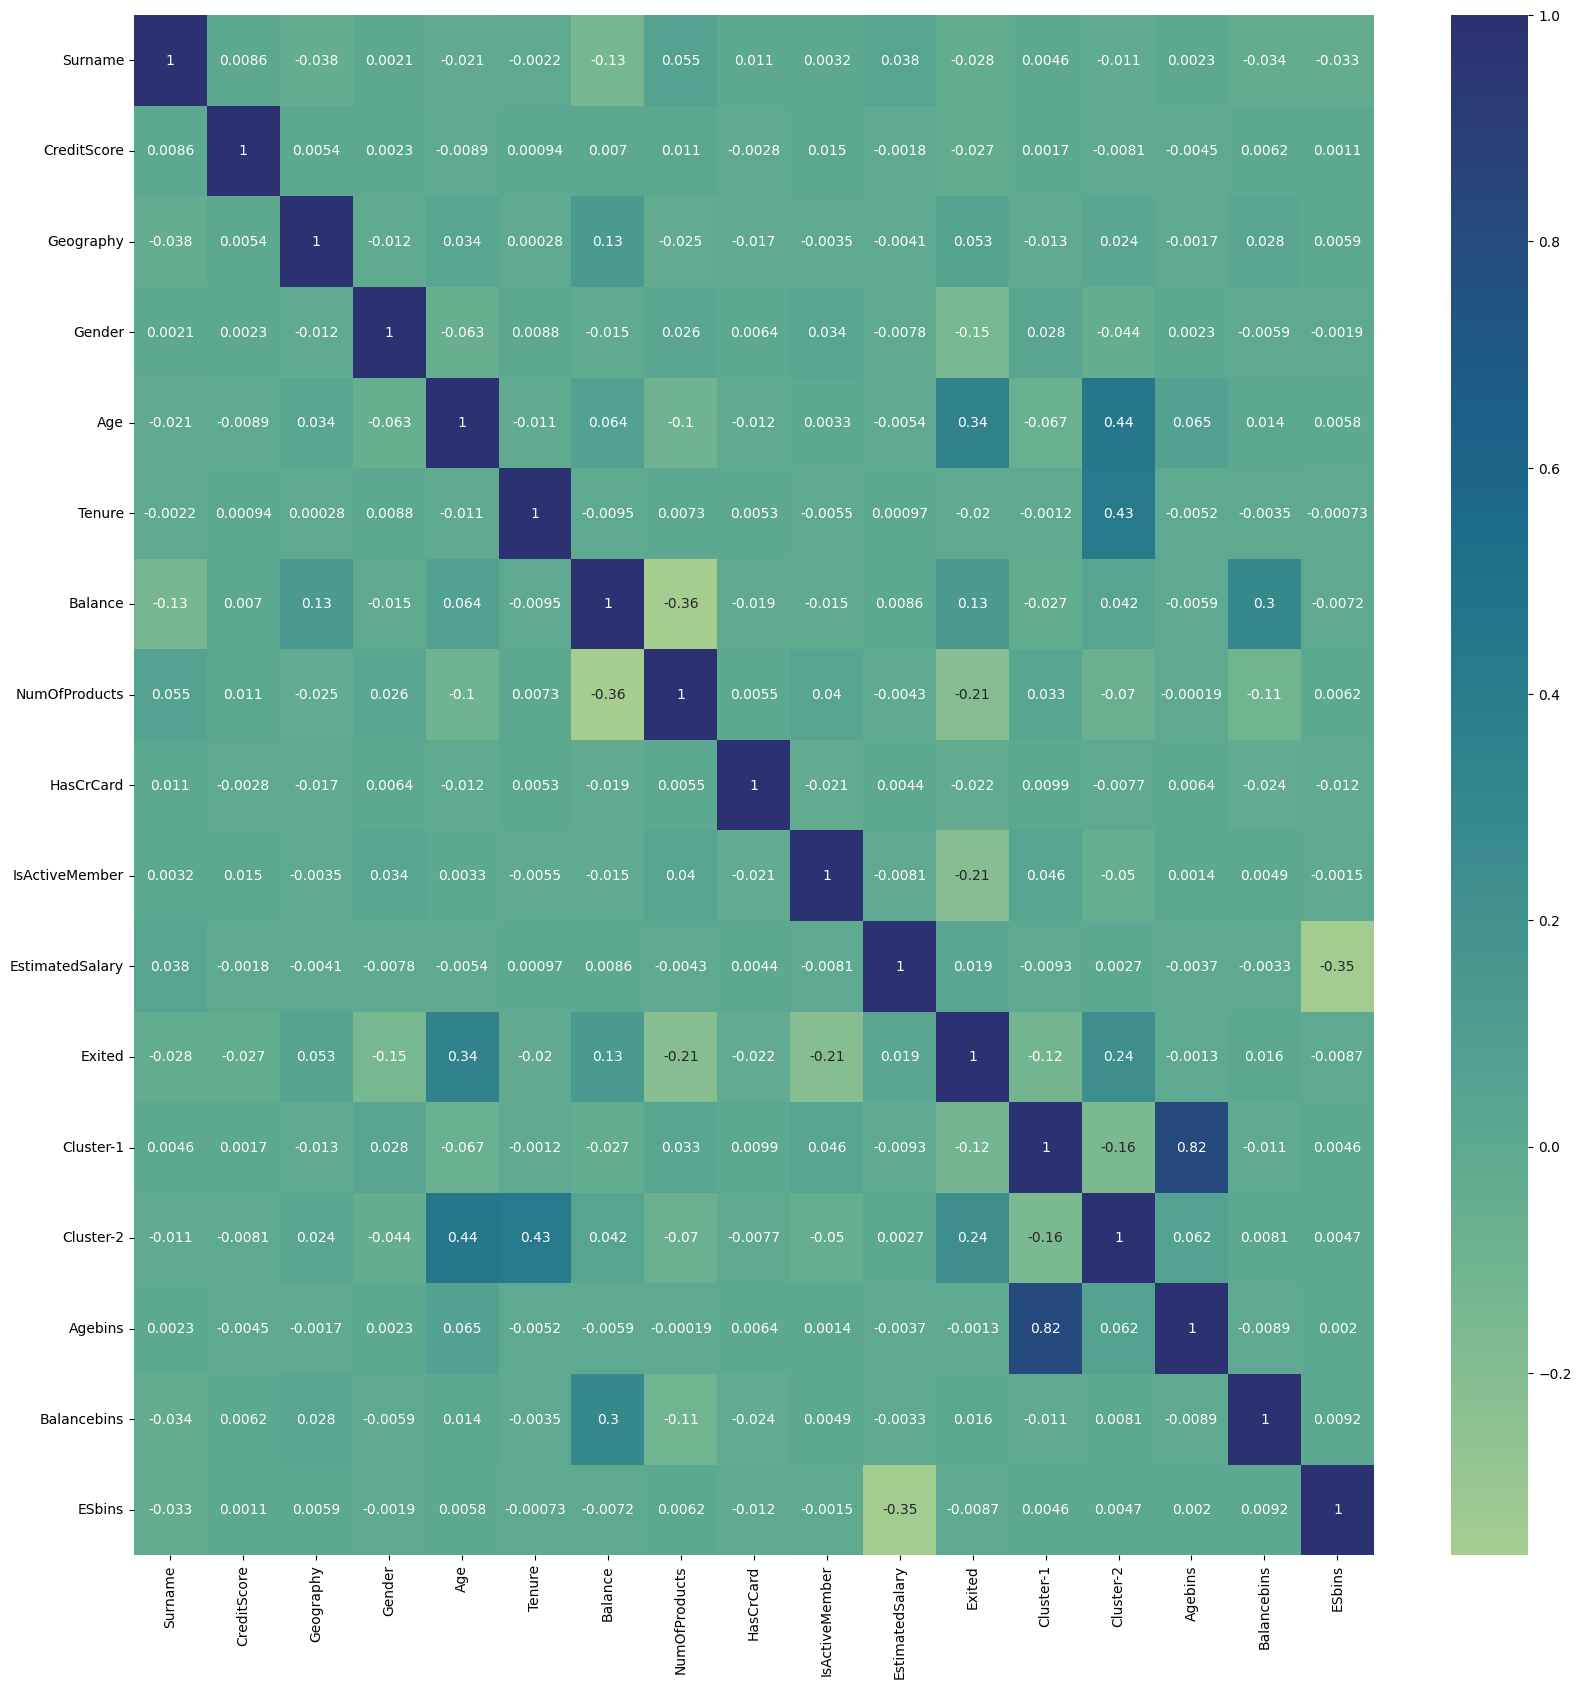

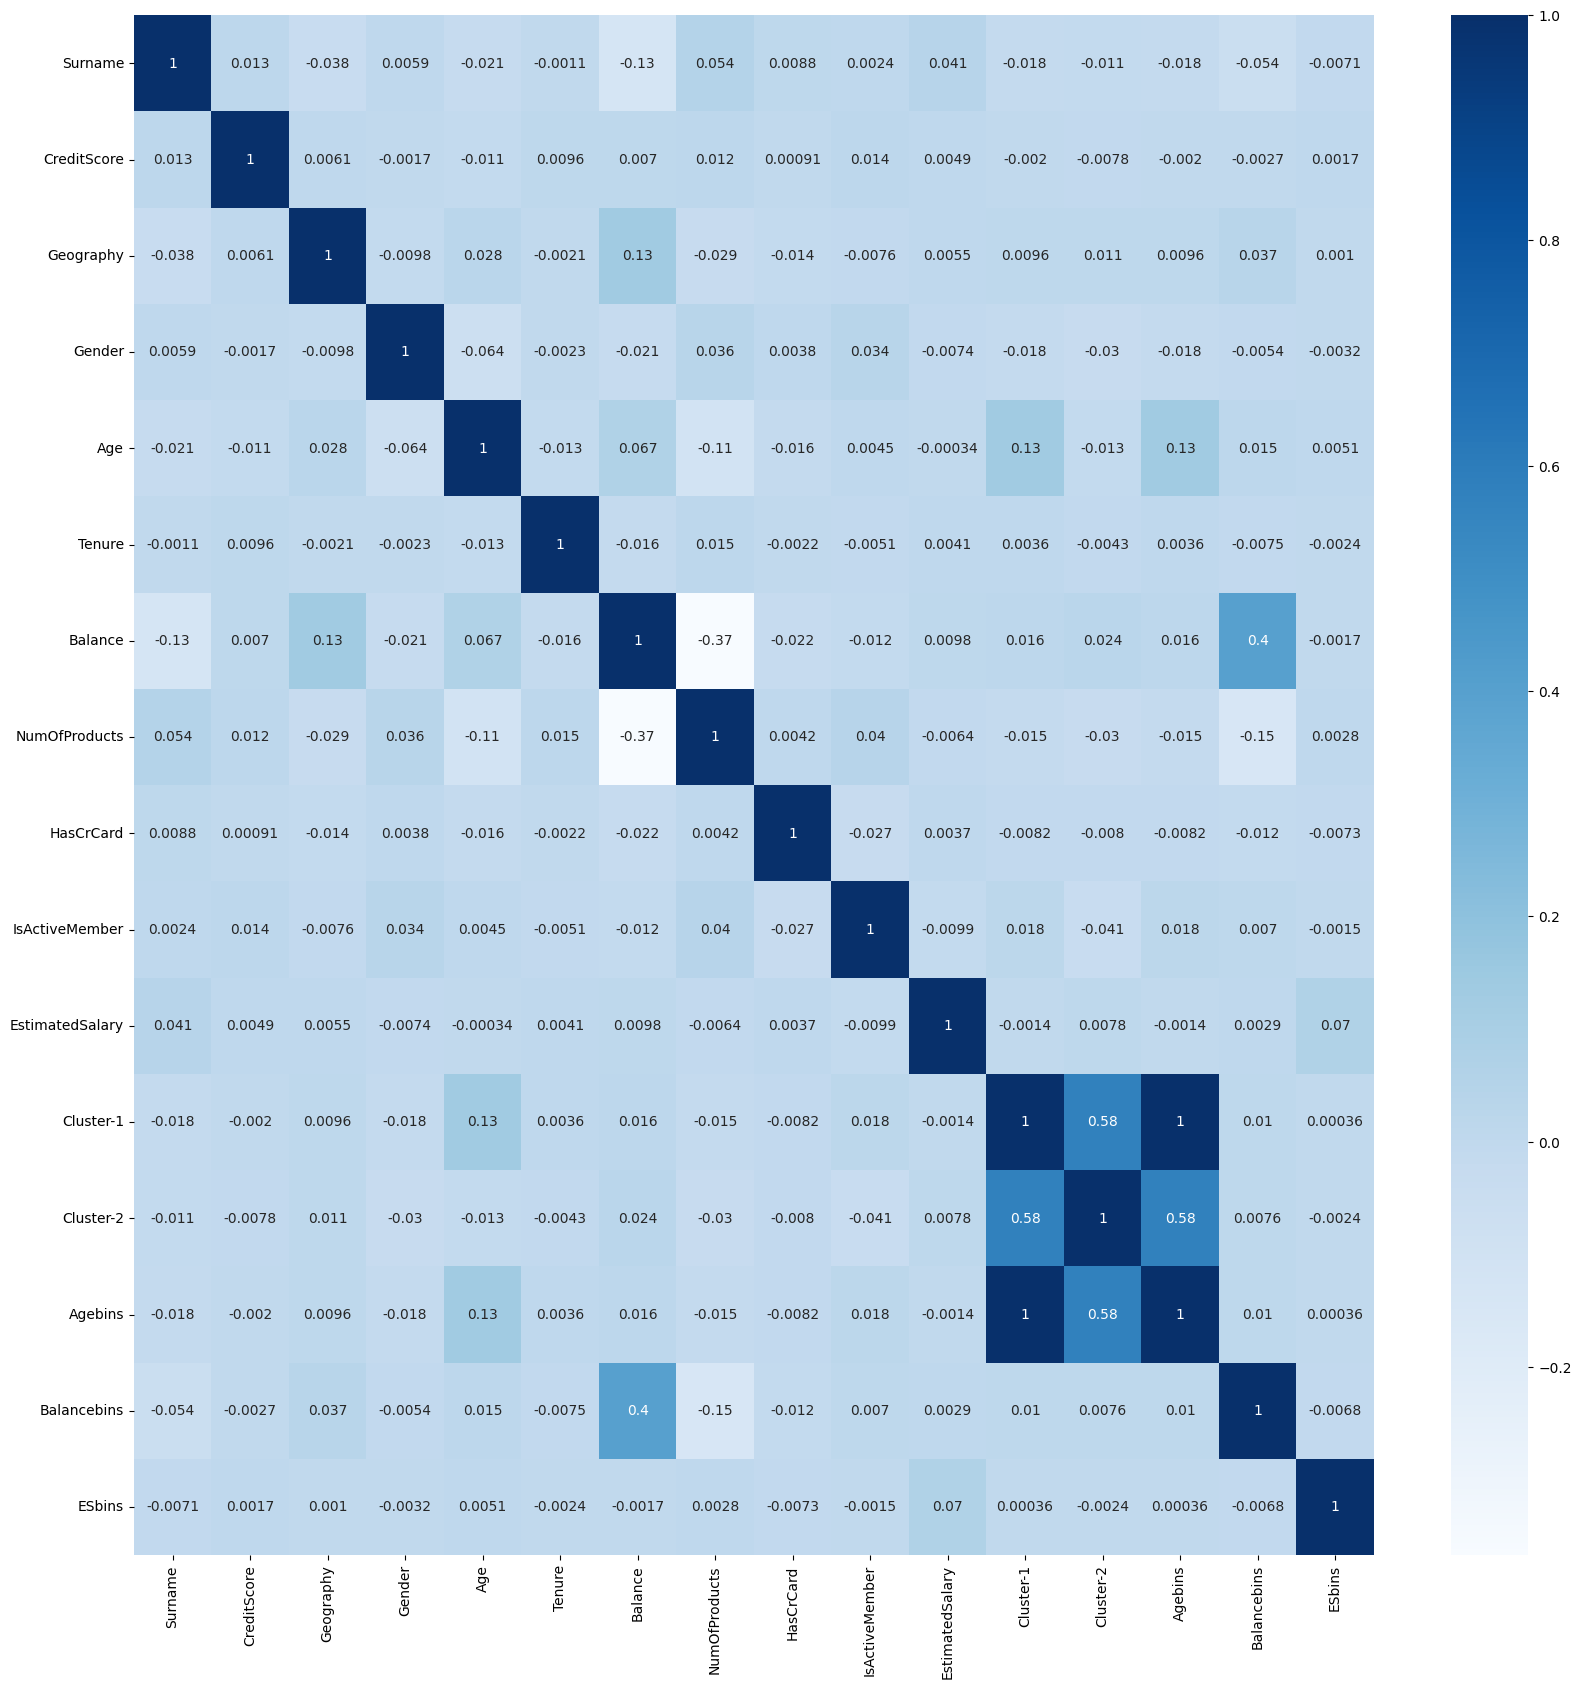

In [23]:
corr = train_df.corr()
# plot the heatmap
plt.figure(figsize=(20, 20))
s=sns.heatmap(corr,annot=True, cmap='crest')
corr = test_df.corr()
# plot the heatmap
plt.figure(figsize=(20, 20))
s=sns.heatmap(corr,annot=True, cmap='Blues')

In [24]:
train_df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Cluster-1,Cluster-2,Agebins,Balancebins,ESbins
0,1924,668,0,1,33.0,3,0.00,2,1.0,0.0,181449.97,0,0.40,0.24,0.40,0.28,0.32
1,1925,627,0,1,33.0,1,0.00,2,1.0,1.0,49503.50,0,0.40,0.24,0.40,0.28,0.28
2,1178,678,0,1,40.0,10,0.00,2,1.0,0.0,184866.69,0,0.24,0.36,0.24,0.28,0.32
3,1299,581,0,1,34.0,2,148882.54,1,1.0,1.0,84560.88,0,0.40,0.24,0.40,0.40,0.36
4,467,716,2,1,33.0,5,0.00,2,1.0,1.0,15068.83,0,0.40,0.28,0.40,0.28,0.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165029,1701,667,2,0,33.0,2,0.00,1,1.0,1.0,131834.75,0,0.40,0.24,0.40,0.28,0.24
165030,1918,792,0,1,35.0,3,0.00,1,0.0,0.0,131834.45,0,0.40,0.24,0.40,0.28,0.24
165031,1172,565,0,1,31.0,5,0.00,1,1.0,1.0,127429.56,0,0.28,0.28,0.28,0.28,0.24
165032,1176,554,2,0,30.0,7,161533.00,1,0.0,1.0,71173.03,0,0.28,0.28,0.28,0.40,0.28


In [25]:
test_df=Onehot(test_df)


Index(['Geography_0', 'Geography_1', 'Geography_2', 'Gender_0', 'Gender_1',
       'Tenure_0', 'Tenure_1', 'Tenure_2', 'Tenure_3', 'Tenure_4', 'Tenure_5',
       'Tenure_6', 'Tenure_7', 'Tenure_8', 'Tenure_9', 'Tenure_10',
       'NumOfProducts_1', 'NumOfProducts_2', 'NumOfProducts_3',
       'NumOfProducts_4', 'HasCrCard_0.0', 'HasCrCard_1.0',
       'IsActiveMember_0.0', 'IsActiveMember_1.0'],
      dtype='object')
Index(['Surname', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary',
       'Cluster-1', 'Cluster-2', 'Agebins', 'Balancebins', 'ESbins',
       'Geography_0', 'Geography_1', 'Geography_2', 'Gender_0', 'Gender_1',
       'Tenure_0', 'Tenure_1', 'Tenure_2', 'Tenure_3', 'Tenure_4', 'Tenure_5',
       'Tenure_6', 'Tenure_7', 'Tenure_8', 'Tenure_9', 'Tenure_10',
       'NumOfProducts_1', 'NumOfProducts_2', 'NumOfProducts_3',
       'NumOfProducts_4', 'HasCrCard_0.0', 'HasCrCard_1.0',
       'IsActiveMember_0.0', 'IsActiveMember_1.0'],
      dtype='object')


# Creating Test and Train Datasets:

In [26]:
train_df['Exited']=train_df['Exited'].astype('category')
X=train_df.drop(columns=['Exited'])
y=train_df[['Exited']].astype('bool')
X=Onehot(X)
print(X.describe())
print(y.describe())

Index(['Geography_0', 'Geography_1', 'Geography_2', 'Gender_0', 'Gender_1',
       'Tenure_0', 'Tenure_1', 'Tenure_2', 'Tenure_3', 'Tenure_4', 'Tenure_5',
       'Tenure_6', 'Tenure_7', 'Tenure_8', 'Tenure_9', 'Tenure_10',
       'NumOfProducts_1', 'NumOfProducts_2', 'NumOfProducts_3',
       'NumOfProducts_4', 'HasCrCard_0.0', 'HasCrCard_1.0',
       'IsActiveMember_0.0', 'IsActiveMember_1.0'],
      dtype='object')
Index(['Surname', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary',
       'Cluster-1', 'Cluster-2', 'Agebins', 'Balancebins', 'ESbins',
       'Geography_0', 'Geography_1', 'Geography_2', 'Gender_0', 'Gender_1',
       'Tenure_0', 'Tenure_1', 'Tenure_2', 'Tenure_3', 'Tenure_4', 'Tenure_5',
       'Tenure_6', 'Tenure_7', 'Tenure_8', 'Tenure_9', 'Tenure_10',
       'NumOfProducts_1', 'NumOfProducts_2', 'NumOfProducts_3',
       'NumOfProducts_4', 'HasCrCard_0.0', 'HasCrCard_1.0',
       'IsActiveMember_0.0', 'IsActiveMember_1.0'],
      dtype='object')
             Surnam

## Scaling the Input

In [27]:
def scale(X):
    from sklearn import preprocessing
    scaled=preprocessing.StandardScaler()
    scaler=scaled.fit(X)
    X=scaler.transform(X)
    return X

In [28]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scale(X),y,train_size=0.99, random_state=42)
X.keys()
test_df=scale(test_df)

# Creation, Training and Testing of Models (Catboost, LightGBM Classifier)

In [29]:
from catboost import CatBoostClassifier
model = CatBoostClassifier(logging_level='Silent')
model.fit(scale(X),y)
model.score(X_test,y=y_test.astype('string'))

0.8837068443367656

In [30]:
from lightgbm import LGBMClassifier 

mod = LGBMClassifier(metric='auc')
mod.fit(X_train, y_train) 
mod.score(X_test,y_test)


0.872198667474258

In [31]:
model.predict_proba(scale(test_df))[:,1]

array([0.03849262, 0.85232728, 0.03127222, ..., 0.02499913, 0.20926549,
       0.22394809])

# Creating Submission File

In [32]:
#y=np.round_(mod.predict_proba(scale(test_df)),decimals=1)
y=np.round_((0.5* model.predict_proba(scale(test_df))[:,1])+(0.5*mod.predict_proba(scale(test_df))[:,1]),decimals=1)
test['Exited']=y
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75,0.0
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27,0.9
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09,0.0
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57,0.3
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00,0.4


In [33]:
submission=test[['id','Exited']]
submission.to_csv('submission.csv', index=False)

In [34]:
submission

,id,Exited
0,165034,0.0
1,165035,0.9
2,165036,0.0
3,165037,0.3
4,165038,0.4
...,...,...
110018,275052,0.0
110019,275053,0.1
110020,275054,0.0
110021,275055,0.2
